# Data Mining Versuch Verkehrsschilderkennung mit Neuronalen Netzen

* Autor: Prof. Dr. Johannes Maucher
* Datum: 01.06.2021

## Abgabe:

- **Abzugeben ist das Jupyter Notebook mit dem verlangten Implementierungen und den entsprechenden Ausgaben.**
- **Das Notebook ist als .ipynb und als .html abzugeben.**
- **Klausurelevante Fragen sind Dokument "Fragenkatalog Datamining" zu finden.**
- Antworten auf Fragen im Notebook, Diskussionen und Beschreibung der Ergebnisse sind optional (aber empfohlen) und werden nicht bewertet.

* [Übersicht Data Mining Praktikum](https://maucher.pages.mi.hdm-stuttgart.de/ai/page/dm/)


# Einführung

In diesem Versuch soll ein Convolutional Neural Network (CNN) für die Erkennung von Verkehrschildern implementiert, trainiert, evaluiert und getestet werden. Als Eingabe erhält das neuronale Netz Bilder von deutschen Verkehrsschildern. Ausgabe ist der Typ des Verkehrsschilds. Für Training und Test sind die Verkehrsschildbilder schon in separate Verzeichnissen abgelegt. Neben den Bildern selbst, enthält das zu diesem Versuch gehörende Datenverzeichnis auch Dateien mit Metadaten, die z.B. Bildeigenschaften, Verkehrsschildbedeutungen und die zugehörigen Klassenlabel beschreiben. Die Daten können Sie von hier herunterladen: https://cloud.mi.hdm-stuttgart.de/s/2mTmkPejeP8s9NL

## Lernziele:

In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Convolutional Neural Networks (CNNs)
* Implementierung Tiefer Neuronaler Netze mit Tensorflow und Keras: 
    - Definition der Netzarchitektur
    - Training
    - Evaluation und Test
    
* Einfache Methoden der Bildverarbeitung:
    - Augmentierung
    - Kontrastverstärkung

* Evaluation eines Klassifikators


## Vorbereitung

### Grundlagen Neuronale Netze

Machen Sie sich mit den [Grundlagen herkömmlicher Neuronaler Netze (KI Vorlesung)](https://lectures.mi.hdm-stuttgart.de/mi7ai/06NeuralNets.html) und den [Grundlagen Convolutional Neural Networks ((KI Vorlesung))](https://lectures.mi.hdm-stuttgart.de/mi7ai/06ConvolutionNeuralNetworks.html) vertraut (**user**: *mi7ai*, **pw**: *ailecture*).


### Implementierung Neuronaler Netze mit Tensorflow und Keras

Machen Sie sich mit der Implementierung von Neuronalen Netzen mit Tensorflow und Keras vertraut. Z.B. mit den [Tensorflow Quickstart Tutorials](https://www.tensorflow.org/tutorials/quickstart/beginner)

# Durchführung

## Vorbereitende Untersuchungen
1. Importieren Sie ein Bild aus dem Verzeichnis `Train` mit der [scikit-image.io](https://scikit-image.org/docs/stable/api/skimage.io.html)-Methode `imread()` und zeigen Sie dieses mit der Methode `imshow()` an. Geben Sie die Größe des Bildes aus (Attribut `.shape`). 
2. Verändern Sie die Größe des Bildes mit der [scikit-image.transform](https://scikit-image.org/docs/stable/api/skimage.transform.html)-Methode `resize()` auf eine Größe von $32x32x3$. Die Verzerrung des Seitenverhältnisses kann dabei ignoriert werden. Diese Methode führt auch eine Normalisierung der Pixelwerte von [0,255] auf [0,1] durch.
3. Führen Sie mit der [scikit-image.exposure](https://scikit-image.org/docs/stable/api/skimage.exposure.html)-Methode `equalize_adapthist()` eine Kontrastverstärkung des Bildes durch. Zeigen Sie das vergrößerte und kontrastangereicherte Bild an. **Anmerkung:** Das kontrastverstärkte Bild sieht zwar unschöner aus, auf der Basis kontrastverstärkter Bilder läßt sich aber im allgemeinen die Objekterkennung verbessern.
2. Importieren Sie die Datei `Train.csv` und machen Sie sich mit deren Inhalt vertraut. Die Datei `Test.csv` ist gleich strukturiert, bezieht sich aber auf die Bilder im Verzeichnis `Test`. Wieviele Zeilen enthalten die Dateien?
3. Importieren Sie die Datei `signnames.csv` und machen Sie sich mit deren Inhalt vertraut. 

In [1]:
import tensorflow as tf
import csv
import pandas as pd
import matplotlib
from matplotlib import image
from matplotlib import pyplot as plt
import skimage.transform
import numpy as np

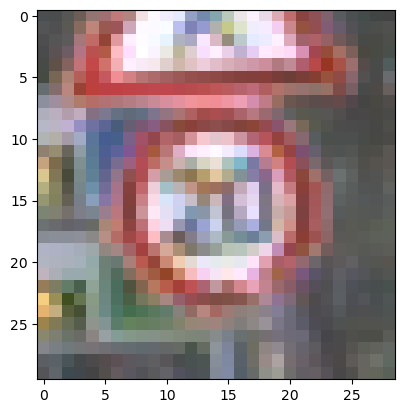

In [2]:
pic = skimage.io.imread(".\\Data\\traffic-sign-recognition\\data\\Train\\0\\00000_00000_00000.png")
plt.imshow(pic)

In [3]:
print(pic.shape)

(30, 29, 3)


In [4]:
pic = skimage.transform.resize(pic,(32,32,3))

In [5]:
print(pic.shape)

(32, 32, 3)


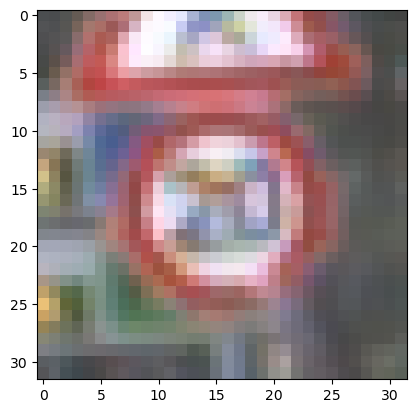

In [6]:
plt.imshow(pic)

[[[0.12519153 0.13000378 0.13333333]
  [0.06319954 0.06496631 0.06666667]
  [0.3287105  0.33333333 0.32593295]
  ...
  [0.0915742  0.1        0.09969461]
  [0.06326655 0.06666667 0.0656446 ]
  [0.         0.         0.        ]]

 [[0.38526545 0.3906168  0.4       ]
  [0.25911038 0.26017536 0.26666667]
  [0.46666667 0.46357405 0.44637136]
  ...
  [0.23756887 0.24988734 0.25      ]
  [0.39021479 0.4        0.386121  ]
  [0.53203299 0.53333333 0.52012805]]

 [[0.19489849 0.19516806 0.2       ]
  [0.39730138 0.39398283 0.4       ]
  [0.6        0.58509351 0.58720088]
  ...
  [0.14588989 0.15       0.14542785]
  [0.26314043 0.26666667 0.25053088]
  [0.46634298 0.46666667 0.44436418]]

 ...

 [[0.79245358 0.80282399 0.83333333]
  [0.70836453 0.73689953 0.76666667]
  [0.64558948 0.69534728 0.71666667]
  ...
  [0.54544597 0.54583333 0.51375104]
  [0.58940838 0.6        0.55895964]
  [0.71746116 0.75       0.71758202]]

 [[0.3688122  0.38385081 0.4       ]
  [0.41500482 0.4442581  0.46666667]


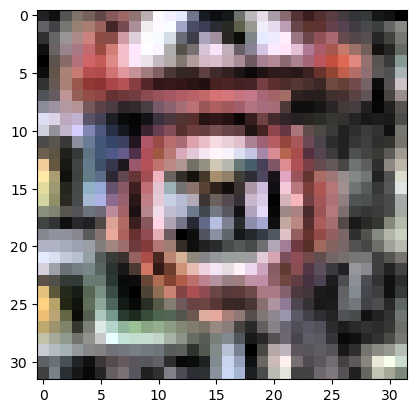

In [7]:
pic = skimage.exposure.equalize_adapthist(pic)
plt.imshow(pic)
print(pic)

In [8]:
train_df = pd.read_csv('.\\Data\\traffic-sign-recognition\\data\\train.csv')
test_df = pd.read_csv('.\\Data\\traffic-sign-recognition\\data\\test.csv')
signname_df = pd.read_csv('.\\Data\\traffic-sign-recognition\\data\\signnames.csv')

print(train_df.shape[0])
print(test_df.shape[0])
print(signname_df.shape[0])

39209
12630
43


In [9]:
print(train_df.head(10))
# print(test_df.head(10))
print(signname_df.head(10))

   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   
5     31      27       6       5      26      22       20   
6     31      28       6       6      26      23       20   
7     31      28       6       6      26      23       20   
8     31      29       5       6      26      24       20   
9     34      32       6       6      29      26       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  
5  Train/20/00020_00000_00005.png  
6  Train/20/00020_00000_00006.png  
7  Train/20/00020_00000_00007.png  
8  T

## Funktion für den Import aller Trainings- bzw. Testbilder
Schreiben Sie eine Funktion mit folgenden Eigenschaften:
* Der Funktion wird der Name der Datei übergeben, in welcher die Metadaten stehen, also entweder `Train.csv` oder `Test.csv`.
* Rückgabewerte der Funktion sind 
    * ein 4-dimensionales numpy-array, das alle Bilder des jeweiligen Verzeichnisses (Training oder Test) enthält.
    * ein 1-dimensionales numpy-array, das die Klassenlabel aller Bilder enthält.
* Die Bilder müssen alle auf eine Größe von $32x32x3$ skaliert werden (wie in der Vorbereitungsaufgabe).
* Für alle Bilder ist eine Kontrastverstärkung durchzuführen (wie in der Vorbereitungsaufgabe).

**Tipps für die Implementierung dieser Funktion:**

Iterieren Sie mit einer for-Schleife über alle Zeilen des metadaten-Files. Pro Iteration kann dann 
* der vollständige Verzeichnis- und Filenamen ausgelesen werden,
* das entsprechende Bild mit `imread()` eingelesen werden,
* das Bild auf die vorgegebene Größe angepasst werden,
* der Kontrast des Bildes verstärkt werden.

**Wichtig:** In den von der Funktion zurückgegebenen Arrays, dürfen die Bilder nicht wie in der ursprünglichen Reihenfolge im Dateiverzeichnis enthalten sein. Um sicherzustellen, dass beim Training jedes Minibatch möglichst viele verschiedene Klassen enthält, muss die Reihenfolge geshuffelt werden. Am einfachsten ist es, wenn gleich die Zeilen des Metadatenfiles geshuffelt werden.

In [10]:
from tqdm import tqdm
def read_data(dataname):
    filename = '.\\Data\\traffic-sign-recognition\\data\\' + dataname
    df = pd.read_csv(filename)


    # train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)

    # test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)
    
    df = df.sample(frac=1, random_state = 42).reset_index(drop=True)
    # df = df.head(20)
    print(df.shape[0])
    array = np.zeros([df.shape[0],32,32,3])
    label_array = []
    
    for index, row in tqdm(df.iterrows()):
        pic_name = row['Path']
        pic_file_path = ".\\Data\\traffic-sign-recognition\\data\\" + pic_name
        pic = skimage.io.imread(pic_file_path)
        pic = skimage.transform.resize(pic,(32,32,3))
        pic = skimage.exposure.equalize_adapthist(pic)
        array[index] = pic
        pic_label = row['ClassId']
        label_array = np.append(label_array,pic_label)

    return array, label_array

In [11]:
trainX, trainY = read_data("train.csv")

39209


39209it [03:08, 208.30it/s]


In [12]:
testX, testY = read_data("test.csv")

12630


12630it [00:59, 213.67it/s]


In [13]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(39209, 32, 32, 3)
(39209,)
(12630, 32, 32, 3)
(12630,)


## Laden und Vorverarbeiten der Trainings- und Testdaten
1. Laden Sie mit der in der vorigen Teilaufgabe implementierten Funktion alle Trainingsbilder (`trainX`), Trainingslabel (`trainY`), Testbilder (`testX`) und Testlabel (`testY`)
1. Bestimmen Sie die Häufigkeitsverteilung der Klassen in den Trainings- und Testdaten. Visualisieren Sie diese.

In [14]:
classes_train = np.array(np.unique(trainY.astype(int), return_counts=True)).T
# classes_train = np.sum(classes_train[:,1])
# print(classes_train)
classes_test = np.array(np.unique(testY.astype(int), return_counts=True)).T
# np.sum(classes_test[:,1])

<BarContainer object of 43 artists>

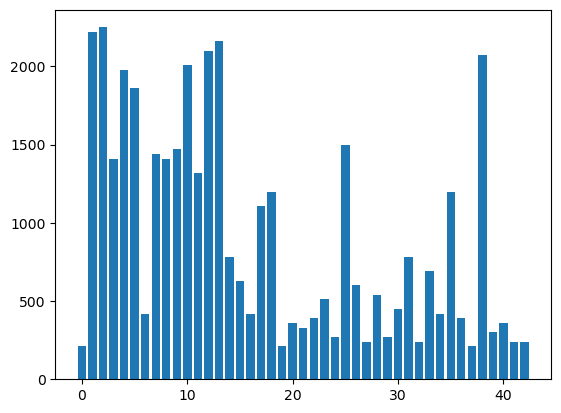

In [15]:
plt.bar(classes_train[:,0],classes_train[:,1])

<BarContainer object of 43 artists>

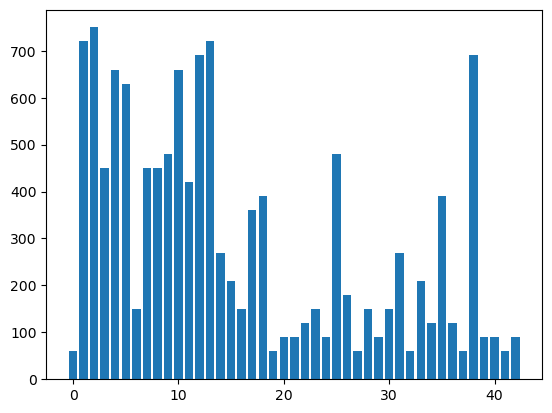

In [16]:
plt.bar(classes_test[:,0],classes_test[:,1])

3. Alle Labels, sowohl der Trainings- als auch der Testdaten müssen One-Hot-encodiert werden.

In [17]:
from sklearn.preprocessing import LabelBinarizer

def one_hot_encoding(lb, feature):
    lb.fit(feature)
    return lb.transform(list(feature))

In [18]:
len(trainY)

39209

In [19]:
lb_train = LabelBinarizer()
print(type(trainY))

lb_train.fit(trainY)
print(lb_train.classes_)
trainY_ohe = lb_train.transform(trainY)
print(trainY)

<class 'numpy.ndarray'>
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42.]
[26. 14. 13. ... 39.  1. 10.]


In [20]:
lb_test = LabelBinarizer()
print(type(testY))

lb_test.fit(testY)
print(lb_test.classes_)
testY_ohe = lb_test.transform(testY)
print(testY_ohe)

<class 'numpy.ndarray'>
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42.]
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Definition der CNN Architektur
Schreiben Sie eine Funktion `generateCNN(width, height, depth, classes)` die eine Keras CNN-Architektur zurück gibt. Für die Definition der Architektur werden dieser Funktion die Parameter:

* `width`: Breite der Bilder
* `height`: Höhe der Bilder
* `depth`: Anzahl der Kanäle pro Bild
* `classes`: Anzahl der unterschiedlichen Klassen

übergeben. Die in der Funktion zu implementierende Architektur ist im folgenden Bild dargestellt. In der Spalte *Output shape* bezeichnen die zweite und dritte Zahl die Breite und die Höhe der einzelnen Kanäle (*Bilder*), der letzte Parameter bezeichnet die Anzahl der Kanäle (Parameter *filters* in der Konfiguration).
In der Übersichtstabelle ist die Filtergröße nicht aufgeführt. Empfohlen sind folgende Größen:
* für alle Pooling Layer: *pool_size=(2,2)*.
* für den ersten Conv2D-Layer: *kernel_size=(5,5)*.
* für alle weiteren Conv2D-Layer: *kernel_size=(3,3)*

**Anmerkung:** Der in der Tabelle mit *flatten_5* bezeichnete Layer ist nicht notwendig und erzeugt in bestimmten Keras-Versionen eine Fehlermeldung. Der Layer sollte nicht in die Architektur mit aufgenommen werden.


<img src="https://maucher.home.hdm-stuttgart.de/Pics/cnnTrafficSign.png" style="width:700px" align="middle">

In [21]:
print(tf.__version__)
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, Activation, BatchNormalization, MaxPool2D
from tensorflow.keras import Model

def generateCNN(width, height, depth, classes):
    model = tf.keras.models.Sequential([
        
        Conv2D(filters = 8, kernel_size=(5,5), padding = "same", input_shape=(width, height, depth)),
        Activation(activation = "relu"),
        BatchNormalization(),
        MaxPool2D(pool_size = (2,2)),
        Conv2D(filters = 16, kernel_size=(3,3), padding = "same"),
        Activation(activation = "relu"),
        BatchNormalization(),
        Conv2D(filters = 16, kernel_size=(3,3), padding = "same"),
        Activation(activation = "relu"),
        BatchNormalization(),
        MaxPool2D(pool_size = (2,2)),
        Conv2D(filters = 32, kernel_size=(3,3), padding = "same"),
        Activation(activation = "relu"),
        BatchNormalization(),
        Conv2D(filters = 32, kernel_size=(3,3), padding = "same"),
        Activation(activation = "relu"),
        MaxPool2D(pool_size = (2,2)),
        Flatten(),
        Dense(128),
        Activation(activation = "relu"),
        BatchNormalization(),
        Dropout(0.2),
        Dense(128),
        Activation(activation = "relu"),
        BatchNormalization(),
        Dropout(0.2),
        Dense(len(classes)),
        Activation(activation = "softmax")
        ])
    return model
    

2.18.0


## Training des CNN
Rufen Sie die im vorigen Abschnitt implementierte Funktion `generateCNN()` auf und weisen Sie die von der Funktion zurückgegebene Architektur der Variablen `model` zu. Durch Aufruf der Funktion `model.summary()` erhalten Sie eine Übersicht des erzeugten Netzes.

Für das Training soll der `Adam`-Algorithmus aus dem Modul `tensorflow.keras.optimizers` benutzt werden. `Adam` implementiert ein *Stochastic Gradient Descent*-Lernverfahren, welches die Lernraten für die Gewichte individuell und dynamisch anpasst.

In den folgenden zwei Codezellen, werden die Trainingsparameter konfiguriert:

In [22]:
model = generateCNN(32,32,3,lb_train.classes_)

C:\Users\Paul Michels\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 8)           │             608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 107,019 (418.04 KB)

 Trainable params: 106,363 (415.48 KB)

 Non-trainable params: 656 (2.56 KB)

In [24]:
from tensorflow.keras.optimizers import Adam

In [25]:
NUM_EPOCHS = 15 # Number of training epochs 
INIT_LR = 1e-3 # Initial Learning Rate for ADAM training
BS = 64 # Size of minibatches

In [26]:
opt = Adam(learning_rate=INIT_LR) 
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

Für das Training sollen nicht nur die vorhandenen Trainingsbilder eingesetzt werden, sondern zusätzlich Bilder die Augmentierungen der Trainingsbilder sind. Augmentierte Bilder können mit dem `ImageDataGenerator` des Moduls `tensorflow.keras.preprocessing.image` erzeugt werden. Der Code für die Erzeugung des in diesem Projekt eingesetzten Objekts ist unten gegeben. 

**Aufgabe:** Erklären Sie was in dieser Codezelle definiert wird.

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# construct the image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

Das Training wird mit folgender Codezelle ausgeführt.

**Aufgabe:** Erklären Sie die Argumente der Funktion `fit()`. 

Für die Ausführung der Zelle muss das Dictionary `classWeight` angelegt sein. Dieses enthält für jede Klasse den Klassenindex als key und den relativen Anteil dieser Klasse in den Trainingsbildern als Value. Wenn z.B. 30% aller Trainingsdaten zur Klasse 0 gehören, dann wäre der Value zum Key 0 der Wert 0.3.

In [28]:
# print(np.sum(classes_train[:,1]))
total_count_train = np.sum(classes_train[:,1])
classWeight = {}
for cl in classes_train:
    classWeight[cl[0]] = (cl[1]/total_count_train)
    
# print(trainX.shape[0])


In [29]:
# compile the model and train the network
print("[INFO] training network...")
H = model.fit(
    aug.flow(trainX, trainY_ohe, batch_size=BS),
    validation_data=(testX, testY_ohe),
    steps_per_epoch=trainX.shape[0] // BS,
    epochs=NUM_EPOCHS,
    class_weight=classWeight,
    verbose=1)

[INFO] training network...
Epoch 1/15


C:\Users\Paul Michels\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


612/612 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.3101 - loss: 0.0850 - val_accuracy: 0.6891 - val_loss: 1.0137
Epoch 2/15
  1/612 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5781 - loss: 0.0249

C:\Users\Paul Michels\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5781 - loss: 0.0249 - val_accuracy: 0.6911 - val_loss: 1.0188
Epoch 3/15
612/612 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.6759 - loss: 0.0239 - val_accuracy: 0.7698 - val_loss: 0.7182
Epoch 4/15
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7812 - loss: 0.0144 - val_accuracy: 0.7644 - val_loss: 0.7337
Epoch 5/15
612/612 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.7923 - loss: 0.0141 - val_accuracy: 0.8249 - val_loss: 0.5407
Epoch 6/15
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7969 - loss: 0.0112 - val_accuracy: 0.8218 - val_loss: 0.5551
Epoch 7/15
612/612 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.8438 - loss: 0.0103 - val_accuracy: 0.8675 - val_loss: 0.3899
Epoch 8/15
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7500 - loss: 0.0097 - val_accuracy: 0.8683 - val_loss: 0.3831
Epoch 9/15
612/612 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8750 - loss: 0.0080 - val_accuracy: 0.838

Visualisieren Sie die Entwicklung der *Accuracy* über dem Fortschritt der Trainingsepochen. Plotten Sie dabei die entsprechenden Kurven der Accuracy auf den Trainings- und auf den Testdaten in einen Graphen.

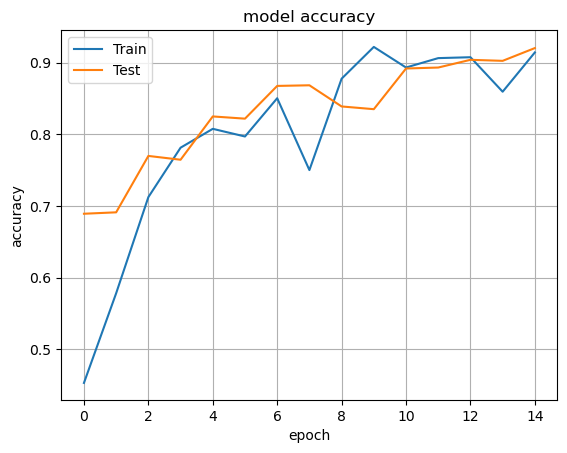

In [30]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)
plt.show()

## Evaluation des gelernten Modells

Wenden Sie das gelernte CNN an, um für alle Bilder des Testdatensatzes die Art des Verkehrsschildes zu bestimmen. Evaluieren Sie die Qualität des CNN indem Sie einen `classification_report()` aus dem Modul `sklearn.metrics` erzeugen. 

1. Welche Metriken werden im Report angezeigt? Beschreiben Sie diese kurz?
2. Diskutieren Sie die Klassifikationsgenauigkeit des CNN anhand des Reports.

Zeigen Sie 5 Bilder an, die nicht korrekt klassifiziert wurden. Läßt sich die Fehlklassifikation erklären?

In [31]:
predictions = model.predict(testX)
predictions_labels = [np.argmax(predictions[index]) for index, i in enumerate(predictions)]

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [32]:
predictions_labels
set(predictions_labels)
testY_ohe

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
from sklearn.metrics import classification_report
print(classification_report(testY, predictions_labels))

              precision    recall  f1-score   support

         0.0       0.95      0.32      0.47        60
         1.0       0.91      0.98      0.95       720
         2.0       0.96      0.96      0.96       750
         3.0       0.99      0.88      0.93       450
         4.0       0.95      0.96      0.95       660
         5.0       0.88      0.89      0.88       630
         6.0       0.91      0.81      0.86       150
         7.0       0.83      0.96      0.89       450
         8.0       0.94      0.90      0.92       450
         9.0       0.96      0.99      0.98       480
        10.0       0.99      0.96      0.98       660
        11.0       0.89      0.92      0.90       420
        12.0       0.96      0.99      0.98       690
        13.0       0.97      1.00      0.99       720
        14.0       0.97      1.00      0.98       270
        15.0       1.00      0.96      0.98       210
        16.0       0.99      0.99      0.99       150
        17.0       1.00    

Classification Report
    
Ein classification Report enthält die folgenden Metriken für jede Klasse: Precision, Recall, F1-Scpre und Support

Intepretation:
    
* Precision:
    * Niedrige Precision in einer Klasse weist auf viele False Positives hin
    * Zu weniger Trainingdaten für eine Klasse
    * Feature ist nicht aussagekräftig genug für diese Klasse
* Recall:
    * Ein niedriger Recall zeigt, dass der Klassifikation viele tatsächlichen Instanzen der Klasse nicht erkennt
    * Zu weniger Trainingdaten für eine Klasse
    * Feature ist nicht aussagekräftig genug für diese Klasse
* F1-Score:
    * Diese Metrik ist wichtig, wenn Precision und Recall für eie Klasse stark variieren
* accuracy: Gibt den Anteil der korrekt klassifizierten datenpunkten an allen Datenpunkten an
    100% = Alle Datenpunkte wurden richtig erkannt
    Funktioniert gut, wenn die Daten gleich verteilt sind
* macro avg: Summe der einzelnen Metriken geteilt durch die Anzahl der Klassen (Arithmetisches Mittel)
* weighted avg: Summe der einzelnen Metriken multipliziert mit dem jeweiligen Support der Klassen, geteilt durch die gesamt Anzahl der Testdaten.
  $$ \sum_{k = 0}^{n} x_k * (\frac{support}{totalSupport}) $$
  * n = Anzahl der Klassen
  * $x_k$ = Wert der Metrik der k-ten Klasse


Die Genauigkeit des Modells liegt bei ca. 90% (&plusmn; 5%, je nach Trainingsablauf), damit dist das Modell recht zuverlässig.
Precision und Recall sind bei weighted Average nah aneinander, was bedeuted dass das Modell gut angepasst ist. Der weighted Average ist aussagekräftiger als der Macro Average, da er die Verteilung der Klassen in den Testdaten berücksichtigt. In der echten Welt kommen Schilder unterschiedlich oft vor, weshalb die Berücksichtigung der Heufigkeit der Schilder relevant ist.

# Hypothese: Die Erhöhung der Epochen beim Training des CNNs, steigert die Accuracy des Modells, da das Modell mehr Epochen hat um die verfügbaren Merkmale zu lernen.


## Traing der Modelle

In [41]:
epochs_to_try = [8, 15, 30, 60]

def train_CNN(epochs, lr, bs, class_weigths):
    history_per_epoch = {}
    for epochs in epochs_to_try:
        print(f"Training with {epochs} epochs...")
        model = generateCNN(32, 32, 3, lb_train.classes_)
        opt = Adam(learning_rate=lr) 
        model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
        
        aug = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.15,
            horizontal_flip=False,
            vertical_flip=False,
            fill_mode="nearest")
              
        history = model.fit(
            aug.flow(trainX, trainY_ohe, batch_size=bs),
            validation_data=(testX, testY_ohe),
            steps_per_epoch=trainX.shape[0] // bs,
            epochs=epochs,
            class_weight=class_weigths,
            verbose=1)
        
        history_per_epoch[epochs] = history

    return history_per_epoch

In [42]:
history = train_CNN(epochs_to_try, 1e-3, 64, classWeight)

Training with 8 epochs...
Epoch 1/8
612/612 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.3340 - loss: 0.0819 - val_accuracy: 0.6827 - val_loss: 1.0234
Epoch 2/8
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6719 - loss: 0.0238 - val_accuracy: 0.6869 - val_loss: 1.0158
Epoch 3/8
612/612 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.7044 - loss: 0.0214 - val_accuracy: 0.7840 - val_loss: 0.7085
Epoch 4/8
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7344 - loss: 0.0136 - val_accuracy: 0.7808 - val_loss: 0.7275
Epoch 5/8
612/612 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.8048 - loss: 0.0124 - val_accuracy: 0.8432 - val_loss: 0.4990
Epoch 6/8
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9219 - loss: 0.0060 - val_accuracy: 0.8424 - val_loss: 0.5000
Epoch 7/8
612/612 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.8548 - loss: 0.0094 - val_accuracy: 0.8686 - val_loss: 0.4214
Epoch 8/8
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9375 - loss:

## Evaluation der Modelle

In [43]:
def plot_graph(h):
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.grid(True)
    plt.show()

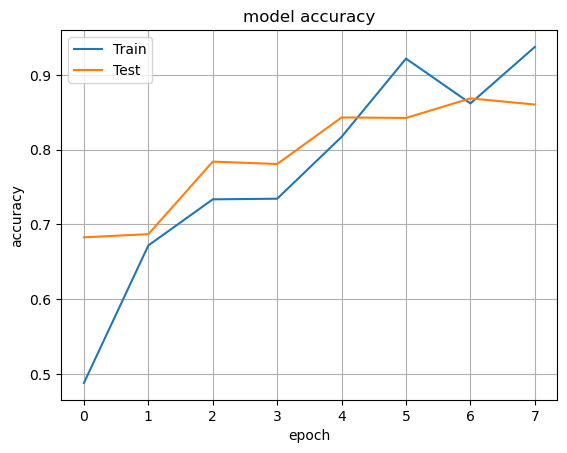

In [44]:
plot_graph(history[8])

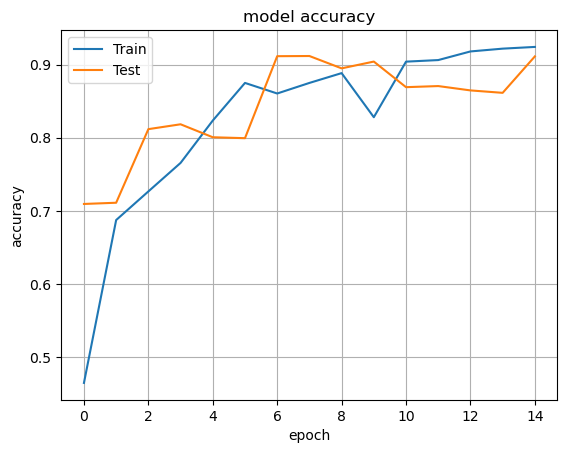

In [45]:
plot_graph(history[15])

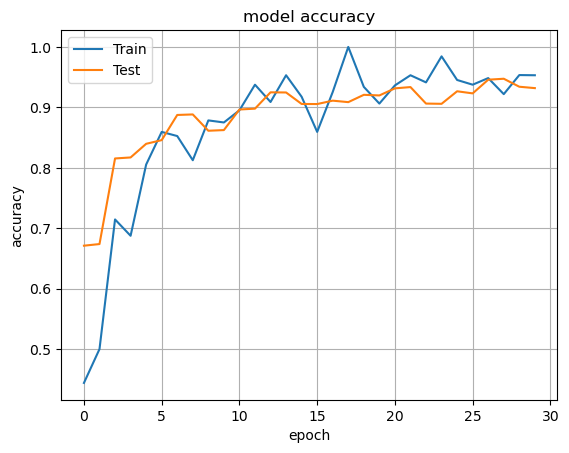

In [46]:
plot_graph(history[30])

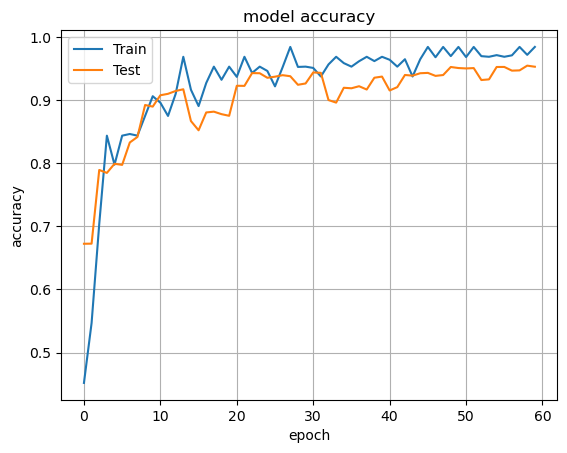

In [47]:
plot_graph(history[60])

## Erkenntnisse 
 * Durch die Erhöhung der Epochenanzahl ist eine deutliche Steigerung der Accuracy erkennbar
 * Die Trainings- und Test-Kurven nähren sich einem Schwellwert der nicht überschritten wird
 * Ab einer gewissen Epochenanzahl (ca.45) ist nur noch eine sehr geringe Änderung in der Accuracy erkennbar

Die Epochenanzahl hat einen erkennbaren Einfluss auf die Accuracy des trainierten Modells. Die Steigerung von 15 auf 30 Epochen verbessert die Accuracy, allerdings bei einer Erhöhung auf 60 Epochen ist keine Verbesserung im Graphen zu erkennen. Das zeigt das eine kontinuierliche Erhöhung der Epochen nicht notwendig ist, da die optimale Epochenanzahl erreicht wurde. Eine weiter Erhöhung der Epochen Anzahl würde sich im Verhältnis der gewonnen Accuracy zu benötigten Rechendauer nicht lohnen.